In [23]:
import pandas_datareader as pdr
import datetime
import pandas as pd
import numpy as np

def get(tickers, startdate, enddate):
  def data(ticker):
    return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
  datas = map (data, tickers)
  return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2010, 10, 1), datetime.datetime(2012, 1, 1))

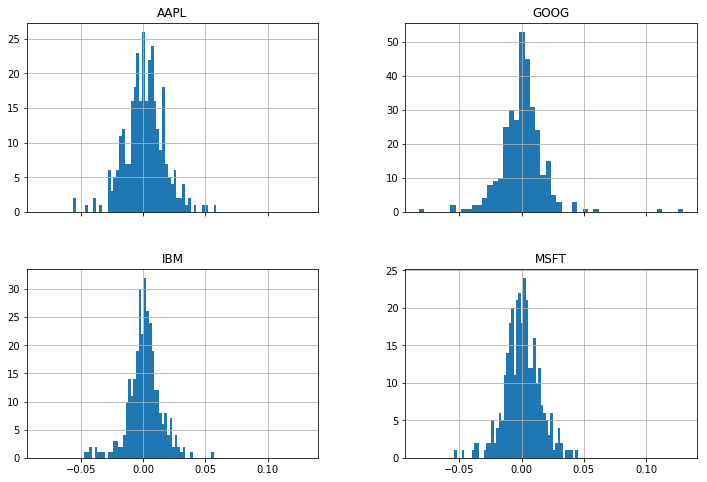

In [24]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Isolate the 'Adj Close' values and transform the DataFrame
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for 'daily_close_px'
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

    scatter_matrix:

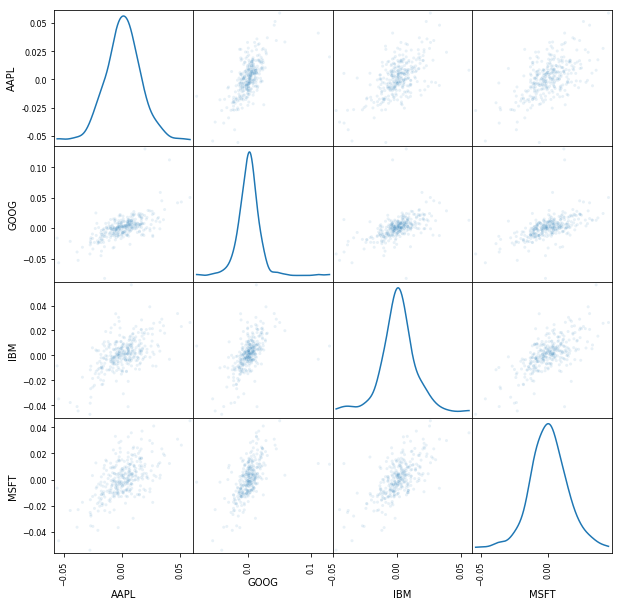

In [25]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot a scatter matrix with the `daily_pct_change` data 
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(10,10))

# Show the plot
plt.show()

In [36]:
# Isolate the adjusted closing prices 
adj_close_px = all_data['Adj Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
print(moving_avg[-10:])

Ticker  Date      
GOOG    2011-12-16    299.257743
        2011-12-19    299.646961
        2011-12-20    300.068594
        2011-12-21    300.598399
        2011-12-22    301.137269
        2011-12-23    301.565360
        2011-12-27    302.063494
        2011-12-28    302.647943
        2011-12-29    303.439668
        2011-12-30    304.198235
Name: Adj Close, dtype: float64


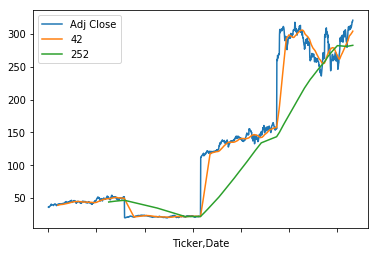

In [37]:
# Import matplotlib 
import matplotlib.pyplot as plt

# Short moving window rolling mean
all_data['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
all_data['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
all_data[['Adj Close', '42', '252']].plot()

# Show plot
plt.show()

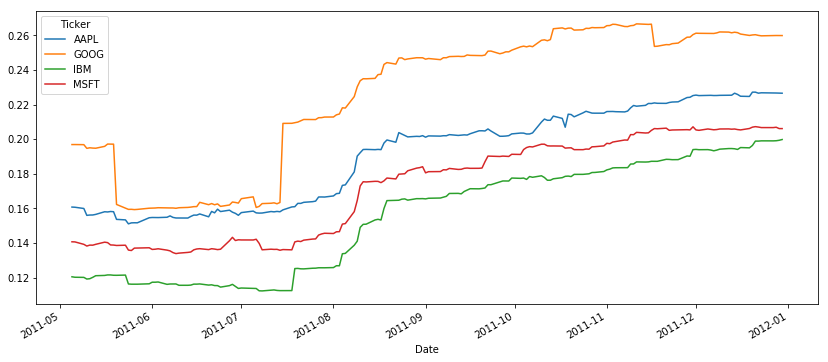

In [38]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Define the minumum of periods to consider 
min_periods = 150

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(14, 6))

# Show the plot
plt.show()

In [39]:
# Import the `api` model of `statsmodels` under alias `sm`
import statsmodels.api as sm

# Import the `datetools` module from `pandas`
from pandas.core import datetools

# Isolate the adjusted closing price
all_adj_close = all_data[['Adj Close']]

# Calculate the returns 
all_returns = np.log(all_adj_close / all_adj_close.shift(1))

# Isolate the AAPL returns 
aapl_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'AAPL']
aapl_returns.index = aapl_returns.index.droplevel('Ticker')

# Isolate the MSFT returns
msft_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'MSFT']
msft_returns.index = msft_returns.index.droplevel('Ticker')

# Build up a new DataFrame with AAPL and MSFT returns
return_data = pd.concat([aapl_returns, msft_returns], axis=1)[1:]
return_data.columns = ['AAPL', 'MSFT']

# Add a constant 
X = sm.add_constant(return_data['AAPL'])

# Construct the model
model = sm.OLS(return_data['MSFT'],X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     152.8
Date:                Thu, 14 Dec 2017   Prob (F-statistic):           7.28e-29
Time:                        23:35:44   Log-Likelihood:                 959.51
No. Observations:                 316   AIC:                            -1915.
Df Residuals:                     314   BIC:                            -1908.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.001     -0.446      0.6

    plot the Ordinary Least-Squares Regression:

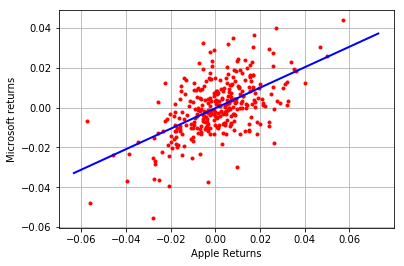

In [40]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot returns of AAPL and MSFT
plt.plot(return_data['AAPL'], return_data['MSFT'], 'r.')

# Add an axis to the plot
ax = plt.axis()

# Initialize `x`
x = np.linspace(ax[0], ax[1] + 0.01)

# Plot the regression line
plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2)

# Customize the plot
plt.grid(True)
plt.axis('tight')
plt.xlabel('Apple Returns')
plt.ylabel('Microsoft returns')

# Show the plot
plt.show()

     crosscheck the results:

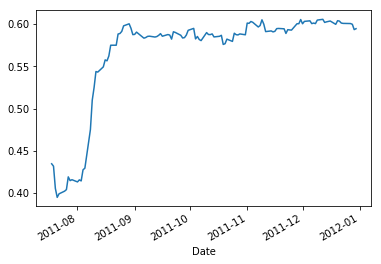

In [41]:
# Import matplotlib 
import matplotlib.pyplot as plt

# Plot the rolling correlation
return_data['MSFT'].rolling(window=200).corr(return_data['AAPL']).plot()

# Show the plot
plt.show()